
Description:
The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.

The datset contains the following fields:
key - a unique identifier for each trip
fare_amount - the cost of each trip in usd
pickup_datetime - date and time when the meter was engaged
passenger_count - the number of passengers in the vehicle (driver entered value)
pickup_longitude - the longitude where the meter was engaged
pickup_latitude - the latitude where the meter was engaged
dropoff_longitude - the longitude where the meter was disengaged
dropoff_latitude - the latitude where the meter was disengaged
Acknowledgement:
The dataset is referred from Kaggle.

Objective:
Understand the Dataset & cleanup (if required).
Build Regression models to predict the fare price of uber ride.
Also evaluate the models & compare thier respective scores like R2, RMSE, etc

In [87]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math
from scipy import stats

In [88]:
df=pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [89]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [90]:
df.shape

(200000, 9)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


# Missing Value Check

In [92]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

# Lets see the data statistics to check for outliers in features

In [93]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,200000.0,NaN,NaN,NaN,27712503.68235,16013822.212829,1.0,13825346.25,27745495.0,41555300.75,55423567.0
key,200000,200000,2015-05-07 19:52:06.0000003,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare_amount,200000.0,NaN,NaN,NaN,11.359955,9.901776,-52.0,6.0,8.5,12.5,499.0
pickup_datetime,200000,196629,2014-04-13 18:19:00 UTC,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_longitude,200000.0,NaN,NaN,NaN,-72.527638,11.437787,-1340.64841,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,200000.0,NaN,NaN,NaN,39.935885,7.720539,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,199999.0,NaN,NaN,NaN,-72.525292,13.117408,-3356.6663,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,199999.0,NaN,NaN,NaN,39.92389,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,200000.0,NaN,NaN,NaN,1.684535,1.385997,0.0,1.0,1.0,2.0,208.0


# outliers are not present in dropoff_longitude and dropoff_latitude hence we can replace the nan vlaue with the mean of it

In [94]:
df.replace(np.nan,df.dropoff_longitude.mean(),inplace=True)
df.replace(np.nan,df.dropoff_latitude.mean(),inplace=True)

# null values are removed

In [95]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [96]:
df.nunique()

Unnamed: 0           200000
key                  200000
fare_amount            1244
pickup_datetime      196629
pickup_longitude      71066
pickup_latitude       83835
dropoff_longitude     76895
dropoff_latitude      90586
passenger_count           8
dtype: int64

# all the values of key and unnamed are unique hence we can drop this column as it wont give any meaningful insight

In [97]:
df.drop(columns=['key','Unnamed: 0'],inplace=True)

In [98]:
df.pickup_datetime = pd.to_datetime(df['pickup_datetime'])


df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Day'] = df['pickup_datetime'].dt.day
df['Hour'] = df['pickup_datetime'].dt.hour
df['Day_Name'] = df['pickup_datetime'].dt.day_name()


# As i have extracted the required information from the pickup_datetime from data i can drop this column


In [99]:
df.drop(columns=['pickup_datetime'],inplace=True)

In [100]:
df.head(2)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day_Name
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,Thursday
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,Friday


# lets calculate the distance between two points to get better insights abouts the fare_amount

In [101]:
def distance(long1, lat1, long2, lat2):

    long1, lat1, long2, lat2 = map(np.radians, [long1, lat1, long2, lat2])

    dlong = long2 - long1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

df['distance'] =distance( df["pickup_longitude"], df["pickup_latitude"], df["dropoff_longitude"], df["dropoff_latitude"])

df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day_Name,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,Thursday,1.682266
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,Friday,2.456047
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,Monday,5.033215
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,Friday,1.660640
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,Thursday,4.472640


# Lets round off the values to two decimal places to make the feature values more readable

In [102]:
df['distance']=round(df['distance'],2)

In [103]:
df['pickup_longitude']=round(df['pickup_longitude'],2)

In [104]:
df['pickup_latitude']=round(df['pickup_latitude'],2)

In [105]:
df['dropoff_longitude']=round(df['dropoff_longitude'],2)

In [106]:
df['dropoff_latitude']=round(df['dropoff_latitude'],2)

In [107]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day_Name,distance
0,7.5,-74.00,40.74,-74.00,40.72,1,2015,5,7,19,Thursday,1.68
1,7.7,-73.99,40.73,-73.99,40.75,1,2009,7,17,20,Friday,2.46
2,12.9,-74.01,40.74,-73.96,40.77,1,2009,8,24,21,Monday,5.03
3,5.3,-73.98,40.79,-73.97,40.80,3,2009,6,26,8,Friday,1.66
4,16.0,-73.93,40.74,-73.97,40.76,5,2014,8,28,17,Thursday,4.47


# Lets Check the no of passengengers used the uber car per ride

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

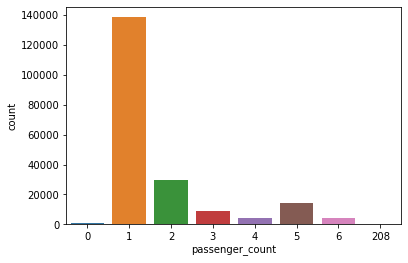

In [108]:
sns.countplot(x='passenger_count',data=df)

# Here Mostly Single person used the uber car,that can be for personal use or office work

In [109]:
df['passenger_count'].value_counts()*100/len(df)

1      69.2125
2      14.7140
5       7.0045
3       4.4405
4       2.1380
6       2.1355
0       0.3545
208     0.0005
Name: passenger_count, dtype: float64

# dropping the passenger count which dosent contribute much to our analysis and also can act as an outlier and make the model biased

In [110]:
df['passenger_count'].replace([0,208,4,6],[np.nan,np.nan,np.nan,np.nan],inplace=True)

In [111]:
df.dropna(axis=0,how='any',thresh=None,subset='passenger_count',inplace=True)

In [112]:
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Day                  0
Hour                 0
Day_Name             0
distance             0
dtype: int64

In [113]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fare_amount,190743.0,NaN,NaN,NaN,11.342801,9.902894,-52.0,6.0,8.5,12.5,499.0
pickup_longitude,190743.0,NaN,NaN,NaN,-72.53196,11.466153,-1340.65,-73.99,-73.98,-73.97,57.42
pickup_latitude,190743.0,NaN,NaN,NaN,39.940178,7.759716,-74.02,40.73,40.75,40.77,1644.42
dropoff_longitude,190743.0,NaN,NaN,NaN,-72.529908,13.216974,-3356.67,-73.99,-73.98,-73.96,1153.57
dropoff_latitude,190743.0,NaN,NaN,NaN,39.925905,6.709875,-881.99,40.73,40.75,40.77,872.7
passenger_count,190743.0,NaN,NaN,NaN,1.541178,1.105786,1.0,1.0,1.0,2.0,5.0
Year,190743.0,NaN,NaN,NaN,2011.718212,1.859177,2009.0,2010.0,2012.0,2013.0,2015.0
Month,190743.0,NaN,NaN,NaN,6.277158,3.437575,1.0,3.0,6.0,9.0,12.0
Day,190743.0,NaN,NaN,NaN,15.701142,8.686653,1.0,8.0,16.0,23.0,31.0
Hour,190743.0,NaN,NaN,NaN,13.485334,6.507689,0.0,9.0,14.0,19.0,23.0


# from the above statistic comapring mean and median we can say that there are outliers in the column fare_amount and distance

# Lets remove the outliers using box plot

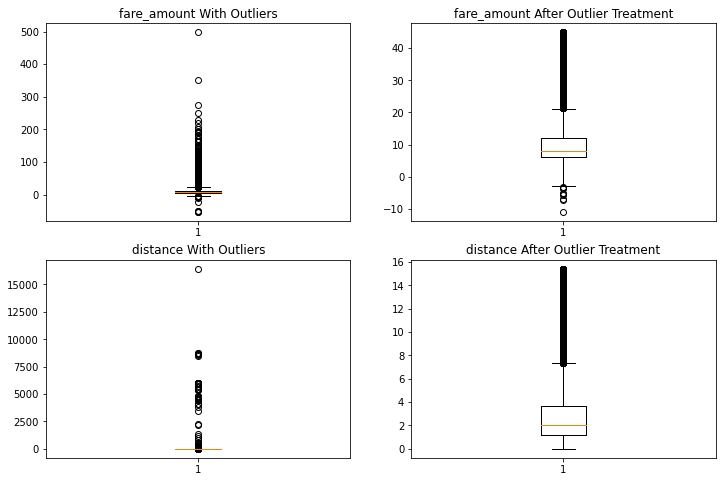

In [114]:
plt.figure(figsize=(12,8))
pc_cols=['fare_amount','distance']
p=0
for j in range(len(pc_cols)):
    var=pc_cols[j]
    p=p+1
    plt.subplot(2, 2, p)
    plt.title(var+' With Outliers')
    plt.boxplot(df[var])
    Q1 = df[var].quantile(0.05)
    Q3 = df[var].quantile(0.90)
    IQR = Q3 - Q1
    df = df[(df[var] >= Q1 - 1.5*IQR) & (df[var] <= Q3 + 1.5*IQR)]
    p=p+1
    plt.subplot(2, 2, p)
    plt.title(var+' After Outlier Treatment')
    plt.boxplot(df[var])

<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

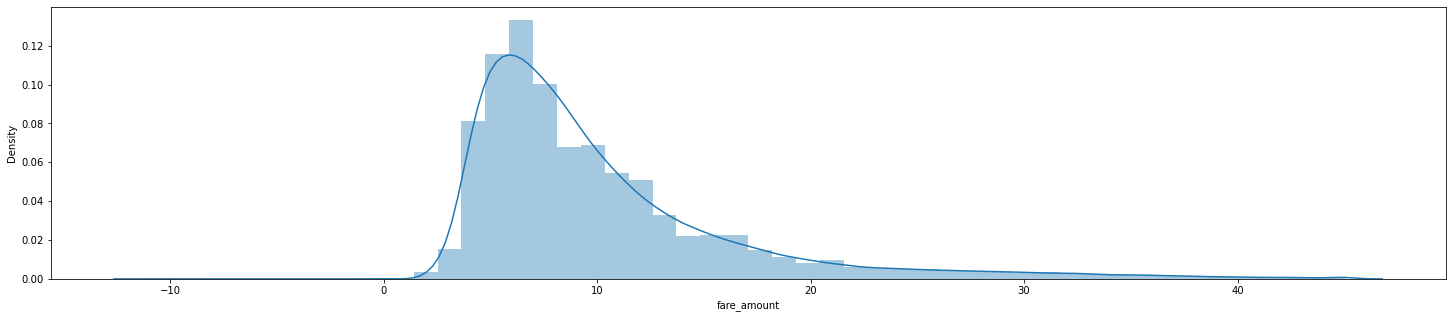

In [115]:
plt.rcParams["figure.figsize"] = (25,5)
sns.distplot(df['fare_amount'],label='fare_amount')

In [116]:
df['fare_amount'].skew()

2.086233636686639

In [117]:
df['fare_amount'].kurt()

5.277360918441104

In [118]:
df.shape

(185087, 12)

# Even after removing the outliers we can see the data is highly skewes and leptokurtic lets remove some outliers with basic maths

# calculation for fare_amount feature

In [119]:
len(df[df['fare_amount']>40])

739

In [120]:
df=df[df['fare_amount']<40]

In [121]:
df.shape

(184315, 12)

# calculation for distance feature

<AxesSubplot:xlabel='distance', ylabel='Density'>

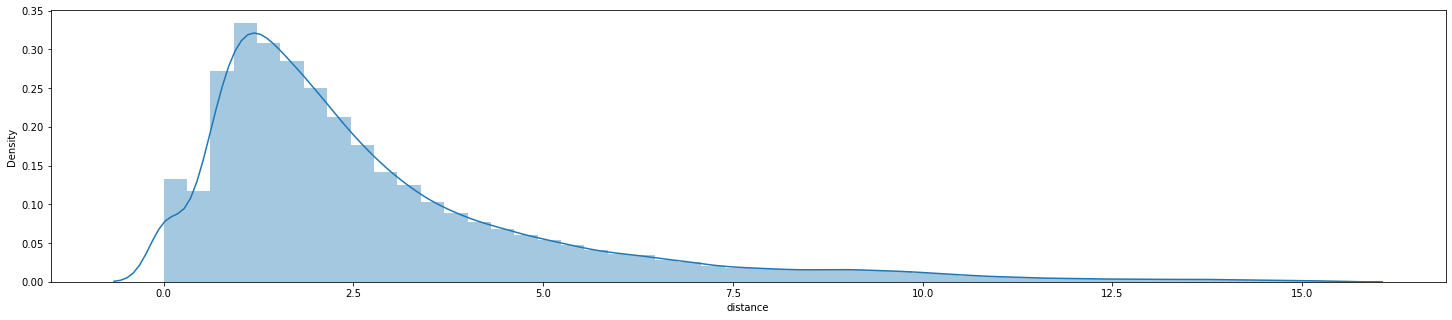

In [122]:
plt.rcParams["figure.figsize"] = (25,5)
sns.distplot(df['distance'],label='distance')

In [123]:
df['distance'].skew()

1.836841337683558

In [124]:
df['distance'].kurt()

3.8574012753767235

In [125]:
df.shape

(184315, 12)

# still we are left with outliers as data is skewed and leptokurtic lets try to remove outliers using knn 

In [126]:
from sklearn.neighbors import NearestNeighbors

In [127]:
data= df[["fare_amount", "distance"]]

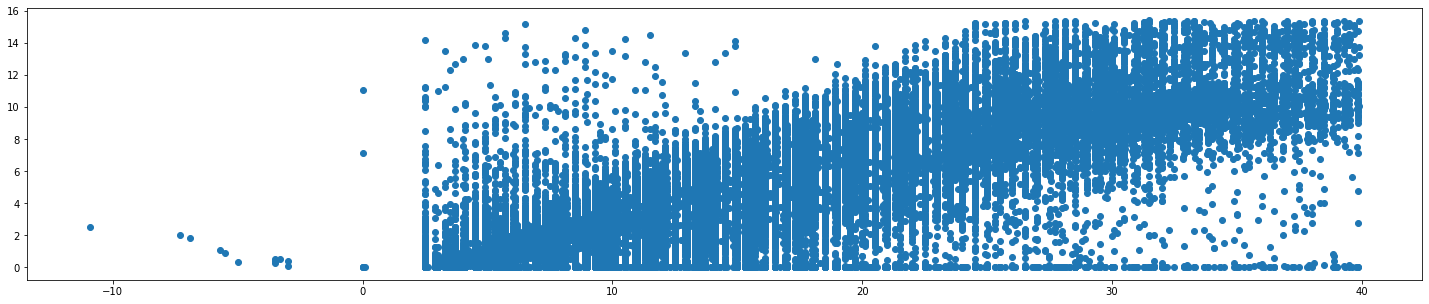

In [128]:
plt.scatter(data["fare_amount"], data["distance"])

In [129]:
# create arrays
X = data.values

In [130]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)

In [131]:
# fit model
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

# Now that we have fitted the model, it’s time to extract model outputs—(a) distances between data points 
# and (b) associated index values — that can be used for detecting anomalies.

In [132]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)

# plot mean of k-distances of each observation

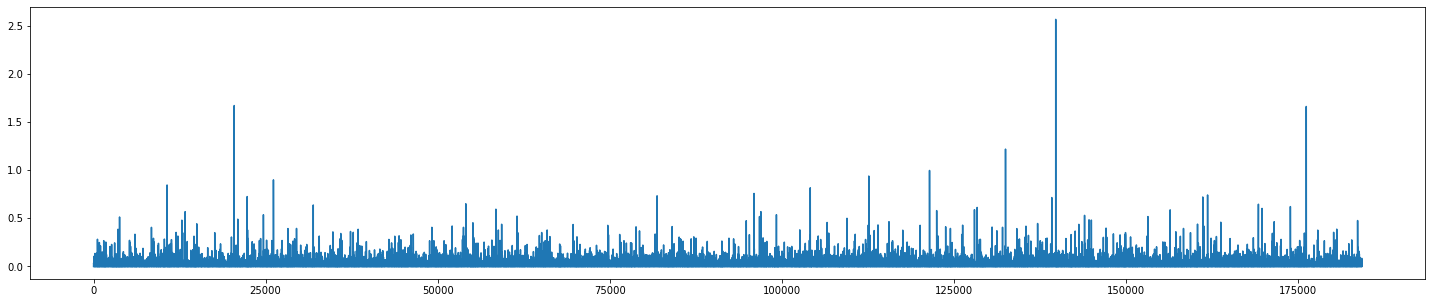

In [133]:
plt.plot(distances.mean(axis =1))

# visually determined cutoff values > 0 and using hit and trial method i have selected 0.09 as the best for now

In [134]:
outlier_index = np.where(distances.mean(axis = 1)>0.09)
outlier_index

(array([    81,    186,    209, ..., 183933, 183959, 184031], dtype=int64),)

In [135]:
outlier_values = data.iloc[outlier_index]
outlier_values

,fare_amount,distance
87,4.50,6.90
196,24.00,13.94
221,29.50,5.09
487,33.70,11.79
594,22.50,14.12
...,...,...
199395,28.80,1.64
199494,38.50,13.03
199580,29.50,4.82
199607,5.30,4.84


In [136]:
outlier_values['fare_amount_outlier']=outlier_values['fare_amount']
outlier_values['distance_outlier']=outlier_values['distance']
outlier_values.drop(columns=['fare_amount','distance'])

,fare_amount_outlier,distance_outlier
87,4.50,6.90
196,24.00,13.94
221,29.50,5.09
487,33.70,11.79
594,22.50,14.12
...,...,...
199395,28.80,1.64
199494,38.50,13.03
199580,29.50,4.82
199607,5.30,4.84


# Outlier values are reprensented in red colour

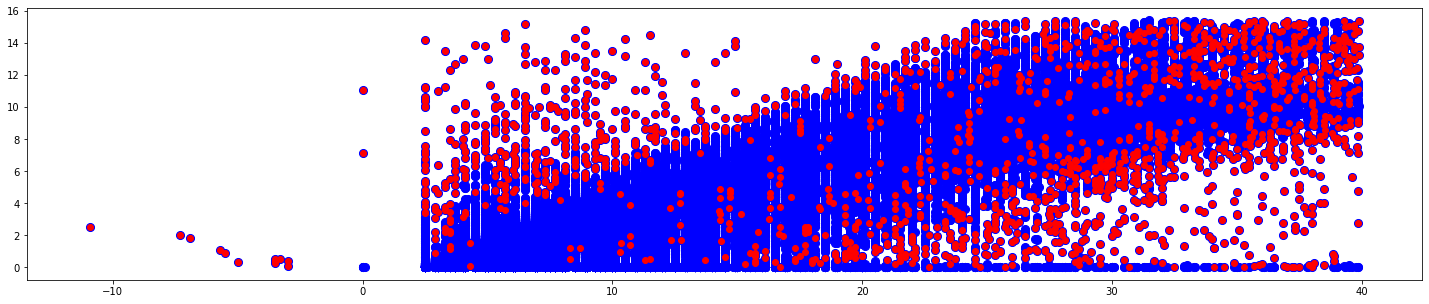

In [137]:
# plot data
plt.scatter(data['fare_amount'], data["distance"],color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["fare_amount_outlier"], outlier_values["distance_outlier"], color = "r")

In [138]:
df=pd.merge(df,outlier_values,how='left')
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day_Name,distance,fare_amount_outlier,distance_outlier
0,7.5,-74.00,40.74,-74.00,40.72,1.0,2015,5,7,19,Thursday,1.68,NaN,NaN
1,7.7,-73.99,40.73,-73.99,40.75,1.0,2009,7,17,20,Friday,2.46,NaN,NaN
2,12.9,-74.01,40.74,-73.96,40.77,1.0,2009,8,24,21,Monday,5.03,NaN,NaN
3,5.3,-73.98,40.79,-73.97,40.80,3.0,2009,6,26,8,Friday,1.66,NaN,NaN
4,16.0,-73.93,40.74,-73.97,40.76,5.0,2014,8,28,17,Thursday,4.47,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184310,3.0,-73.99,40.74,-73.99,40.74,1.0,2012,10,28,10,Sunday,0.11,NaN,NaN
184311,7.5,-73.98,40.74,-74.01,40.74,1.0,2014,3,14,1,Friday,1.87,NaN,NaN
184312,30.9,-73.99,40.76,-73.86,40.69,2.0,2009,6,29,0,Monday,12.84,NaN,NaN
184313,14.5,-74.00,40.73,-73.98,40.70,1.0,2015,5,20,14,Wednesday,3.54,NaN,NaN


In [139]:
df['fare_amount_outlier'].replace(np.nan,0,inplace=True)
for i in df['fare_amount_outlier']:
    if i!=0:
        df['fare_amount_outlier'].replace(i,np.nan,inplace=True)
df.dropna(axis=0,how='any',thresh=None,subset='fare_amount_outlier',inplace=True)

In [140]:
df.drop(columns=['fare_amount_outlier','distance_outlier'],inplace=True)

In [141]:
df.head(2)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day_Name,distance
0,7.5,-74.00,40.74,-74.00,40.72,1.0,2015,5,7,19,Thursday,1.68
1,7.7,-73.99,40.73,-73.99,40.75,1.0,2009,7,17,20,Friday,2.46


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

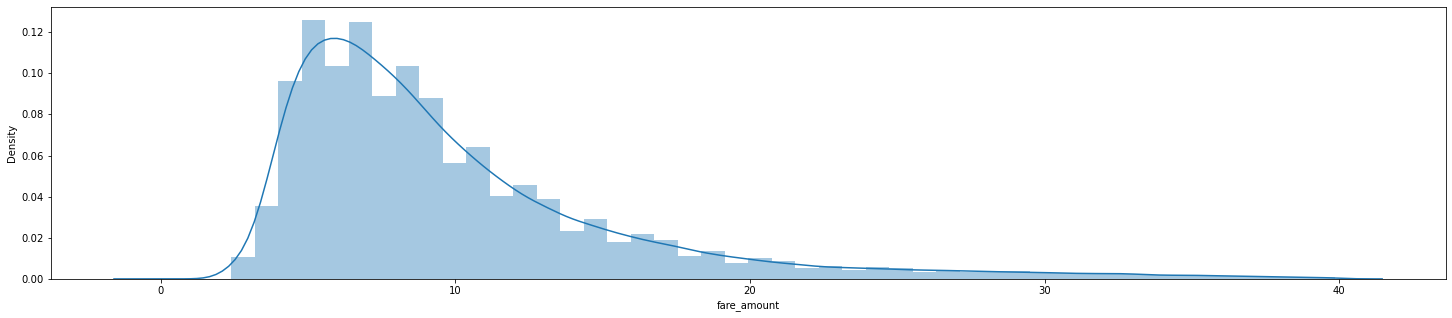

In [142]:
plt.rcParams["figure.figsize"] = (25,5)
sns.distplot(df['fare_amount'],label='fare_amount')

<AxesSubplot:xlabel='distance', ylabel='Density'>

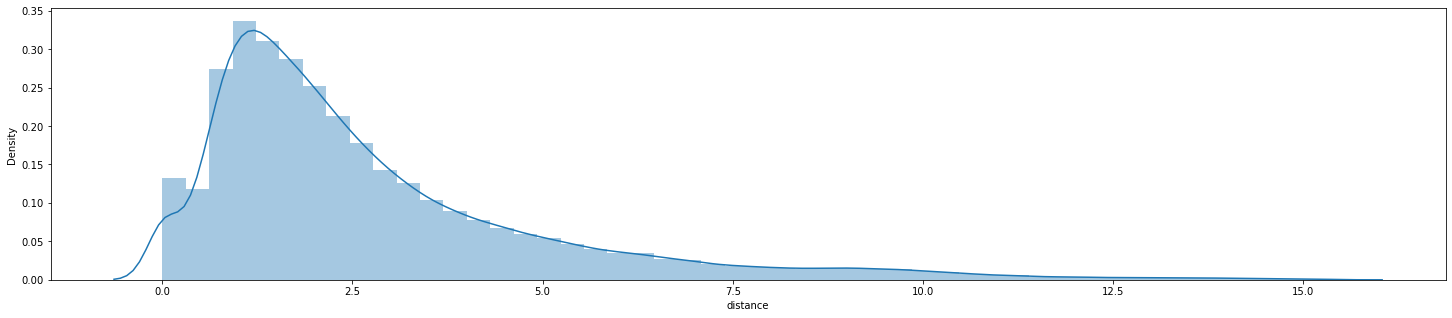

In [143]:
plt.rcParams["figure.figsize"] = (25,5)
sns.distplot(df['distance'],label='distance')

# Lets CHeck the correlation of target variable with independent features

In [144]:
correlation = df.corr()
correlation['fare_amount']

fare_amount          1.000000
pickup_longitude     0.001246
pickup_latitude     -0.001291
dropoff_longitude    0.001442
dropoff_latitude    -0.001444
passenger_count      0.004033
Year                 0.132849
Month                0.030226
Day                  0.003684
Hour                -0.021237
distance             0.862341
Name: fare_amount, dtype: float64

# here distance is highly correlated with target and its the fact with distance fare rises or vice versa

<AxesSubplot:>

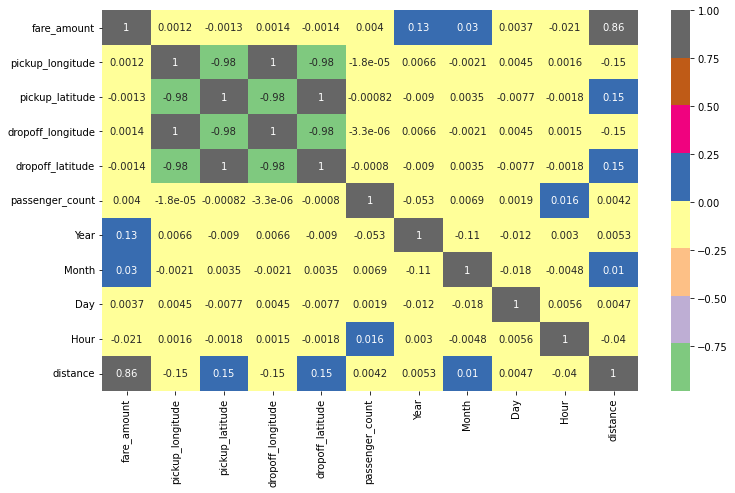

In [145]:
plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot=True,cmap='Accent')

In [146]:
#df["Day_Name"].replace(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],[1,2,3,4,5,6,7],inplace=True)

# Lets convert the categorical column to numerical for further analysis

In [147]:
from sklearn.preprocessing import OneHotEncoder 
#since here we have a problem of multicollinearity we will drop
ohe = OneHotEncoder(dtype=np.int32) #Initialising

In [148]:
df['Day_Name']=ohe.fit_transform(df[['Day_Name']]).toarray()

# Lets Separate Target variable from indepentt features for analysis

In [149]:
x=df.drop(columns=['fare_amount'])
x.head(2)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day_Name,distance
0,-74.00,40.74,-74.00,40.72,1.0,2015,5,7,19,0,1.68
1,-73.99,40.73,-73.99,40.75,1.0,2009,7,17,20,1,2.46


In [150]:
x.isna().sum()

pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Day                  0
Hour                 0
Day_Name             0
distance             0
dtype: int64

# Checking for muticollinearity using VIF

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [152]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)

              feature           VIF
0    pickup_longitude  8.299466e+06
1     pickup_latitude  2.898573e+06
2   dropoff_longitude  8.298952e+06
3    dropoff_latitude  2.898000e+06
4     passenger_count  2.940602e+00
5                Year  6.805218e+01
6               Month  4.322783e+00
7                 Day  4.271862e+00
8                Hour  5.324958e+00
9            Day_Name  1.183258e+00
10           distance  2.454747e+00


# since pickup_longitude and dropoff_longitude are highly correlated will drop one among them

In [153]:
df.drop(columns=['pickup_longitude','dropoff_longitude'],inplace=True)

In [154]:
x=df.drop(columns=['fare_amount'])
x.head(2)

,pickup_latitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day_Name,distance
0,40.74,40.72,1.0,2015,5,7,19,0,1.68
1,40.73,40.75,1.0,2009,7,17,20,1,2.46


In [155]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)

            feature           VIF
0   pickup_latitude  2.446612e+06
1  dropoff_latitude  2.446615e+06
2   passenger_count  2.940489e+00
3              Year  5.930557e+01
4             Month  4.322546e+00
5               Day  4.270616e+00
6              Hour  5.307524e+00
7          Day_Name  1.183123e+00
8          distance  2.416154e+00


# now VIF looks some what fine so we move ahead for modelling 

In [156]:
df.head(2)

,fare_amount,pickup_latitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Day_Name,distance
0,7.5,40.74,40.72,1.0,2015,5,7,19,0,1.68
1,7.7,40.73,40.75,1.0,2009,7,17,20,1,2.46


In [157]:
y=df['fare_amount']
y.head(2)

0    7.5
1    7.7
Name: fare_amount, dtype: float64

In [158]:
df.shape

(182605, 10)

# Test Train Split

In [159]:
from sklearn.model_selection import  train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [160]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=42)

In [161]:
scaled = StandardScaler()

# Model With  Linear Regression

In [162]:
lr=LinearRegression(normalize=True)

# creating pipeline

In [163]:
pipe = make_pipeline(scaled,lr)

In [164]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [165]:
y_predicted = pipe.predict(x_test)

In [166]:
from sklearn.metrics import mean_squared_error as MSE

accuracy0 = pipe.score(x_test,y_test)
MSE_score = MSE(y_test,y_predicted)


print("R2 value :",r2_score (y_test,y_predicted))
print("Adjusted R2:",1 - (1-pipe.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1))

print("Training Accuracy0:",pipe.score(x_train,y_train))
print("Testing Accuracy0:",accuracy0)
print("Mean Squared Error",MSE_score.mean())

import math
print("Root Mean Squared Error",math.sqrt(MSE_score.mean())) 

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error",mean_absolute_error(y_test, y_predicted))

R2 value : 0.7784507823273934
Adjusted R2: 0.779851937515105
Training Accuracy0: 0.7802136234834858
Testing Accuracy0: 0.7784507823273934
Mean Squared Error 7.890766046494117
Root Mean Squared Error 2.809050737614776
Mean Absolute Error 1.8620667183244461


# Model With Ridge Regression

In [167]:
from sklearn.linear_model import Ridge

ridgereg=Ridge(alpha=0.001,normalize=True)

pipe2 = make_pipeline(scaled,ridgereg)
pipe2.fit(x_train,y_train)
y_predicted = pipe2.predict(x_test)
print("R2 value :",r2_score (y_test,y_predicted))
print("Adjusted R2:",1 - (1-pipe2.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1))

accuracy1 = pipe2.score(x_test,y_test)
MSE_score1 = MSE(y_test,y_predicted)

print("Training Accuracy0:",pipe2.score(x_train,y_train))
print("Testing Accuracy0:",accuracy1)
print("Mean Squared Error",MSE_score1.mean())
import math
print("Root Mean Squared Error",math.sqrt(MSE_score1.mean())) 

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error",mean_absolute_error(y_test, y_predicted))

R2 value : 0.7770449770132162
Adjusted R2: 0.778291501382877
Training Accuracy0: 0.7786146840901441
Testing Accuracy0: 0.7770449770132162
Mean Squared Error 7.940835647089514
Root Mean Squared Error 2.8179488368473824
Mean Absolute Error 1.8700724384752934


# Model With Lasso Regression

In [82]:
from sklearn.linear_model import Lasso

regressor=Lasso(alpha=0.001,normalize=True)

pipe2 = make_pipeline(scaled,regressor)
pipe2.fit(x_train,y_train)
y_predicted = pipe2.predict(x_test)
print("R2 value :",r2_score (y_test,y_predicted))
print("Adjusted R2:",1 - (1-pipe2.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1))

accuracy1 = pipe2.score(x_test,y_test)
MSE_score1 = MSE(y_test,y_predicted)

print("Training Accuracy0:",pipe2.score(x_train,y_train))
print("Testing Accuracy0:",accuracy1)
print("Mean Squared Error",MSE_score1.mean())
import math
print("Root Mean Squared Error",math.sqrt(MSE_score1.mean())) 

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error",mean_absolute_error(y_test, y_predicted))

R2 value : 0.763228785734299
Adjusted R2: 0.7647447387148886
Training Accuracy0: 0.7651391175962214
Testing Accuracy0: 0.763228785734299
Mean Squared Error 8.432917425489892
Root Mean Squared Error 2.9039485920880024
Mean Absolute Error 1.9424588216931034


# Model with Decision Tree Regressor

In [83]:
from sklearn.tree import DecisionTreeRegressor

regressor=DecisionTreeRegressor(max_depth=5,min_samples_leaf=20,random_state=0)

pipe= make_pipeline(scaled,regressor)
pipe.fit(x_train,y_train)
y_predicted = pipe.predict(x_test)
print("R2 value :",r2_score (y_test,y_predicted))
print("Adjusted R2:",1 - (1-pipe.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1))

accuracy1 = pipe.score(x_test,y_test)
MSE_score1 = MSE(y_test,y_predicted)

print("Training Accuracy0:",pipe.score(x_train,y_train))
print("Testing Accuracy0:",accuracy1)
print("Mean Squared Error",MSE_score1.mean())

print("Root Mean Squared Error",math.sqrt(MSE_score1.mean())) 


print("Mean Absolute Error",mean_absolute_error(y_test, y_predicted))


R2 value : 0.8024314225078617
Adjusted R2: 0.8023654911577649
Training Accuracy0: 0.8023625373178721
Testing Accuracy0: 0.8024314225078617
Mean Squared Error 7.03666408532692
Root Mean Squared Error 2.652671122722702
Mean Absolute Error 1.7958846629438754


# Random Forest

In [84]:
from sklearn.ensemble import RandomForestRegressor

trf2 =RandomForestRegressor(max_depth=5,min_samples_leaf=20,bootstrap= True,random_state=0,n_estimators=200)

pipe= make_pipeline(scaled,trf2)
pipe.fit(x_train,y_train)
y_predicted = pipe.predict(x_test)
print("R2 value :",r2_score (y_test,y_predicted))
print("Adjusted R2:",1 - (1-pipe.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1))

accuracy1 = pipe.score(x_test,y_test)
MSE_score1 = MSE(y_test,y_predicted)

print("Training Accuracy0:",pipe.score(x_train,y_train))
print("Testing Accuracy0:",accuracy1)
print("Mean Squared Error",MSE_score1.mean())

print("Root Mean Squared Error",math.sqrt(MSE_score1.mean())) 


print("Mean Absolute Error",mean_absolute_error(y_test, y_predicted))

R2 value : 0.8067466711829303
Adjusted R2: 0.8081301660061446
Training Accuracy0: 0.8084885261819319
Testing Accuracy0: 0.8067466711829303
Mean Squared Error 6.88297084242083
Root Mean Squared Error 2.6235416601267896
Mean Absolute Error 1.7760093995447406


In [85]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(trf2.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


# comparison

In [86]:
for i,j in zip(y_test,y_predicted):
    print(i,"<->",round(j,2))

5.3 <-> 5.22
6.5 <-> 9.72
4.5 <-> 5.22
5.5 <-> 5.22
8.5 <-> 8.66
5.3 <-> 6.29
6.5 <-> 6.29
10.5 <-> 11.89
4.1 <-> 5.22
26.0 <-> 24.92
8.5 <-> 9.06
6.1 <-> 6.9
6.5 <-> 6.9
14.1 <-> 16.15
12.5 <-> 10.97
6.5 <-> 6.51
6.5 <-> 6.9
6.0 <-> 6.29
4.0 <-> 5.22
5.3 <-> 6.89
8.5 <-> 9.13
6.9 <-> 5.22
5.7 <-> 6.85
18.9 <-> 17.72
17.3 <-> 23.9
5.3 <-> 6.29
18.1 <-> 24.53
6.5 <-> 6.91
6.1 <-> 6.29
9.7 <-> 10.87
18.1 <-> 17.64
8.9 <-> 8.66
18.5 <-> 15.01
8.0 <-> 5.69
6.5 <-> 6.29
2.5 <-> 6.06
7.3 <-> 6.42
7.0 <-> 9.15
11.5 <-> 10.87
7.0 <-> 7.96
19.7 <-> 6.93
6.5 <-> 6.29
10.5 <-> 12.23
4.0 <-> 5.22
14.0 <-> 16.22
15.3 <-> 15.72
13.5 <-> 10.51
4.5 <-> 5.68
4.9 <-> 9.83
20.1 <-> 17.65
5.5 <-> 6.29
6.1 <-> 6.44
12.5 <-> 10.33
16.0 <-> 9.15
10.1 <-> 13.51
4.5 <-> 5.22
5.3 <-> 6.9
10.0 <-> 5.27
12.5 <-> 12.13
6.0 <-> 5.22
4.5 <-> 10.1
15.7 <-> 17.64
9.7 <-> 8.66
4.5 <-> 5.22
10.5 <-> 9.9
8.0 <-> 6.29
4.9 <-> 5.97
6.9 <-> 6.9
4.1 <-> 5.97
5.7 <-> 6.9
7.3 <-> 7.44
10.9 <-> 8.98
7.7 <-> 6.9
5.7 <-> 6.19
6.5